In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 01-Line, Area

In [2]:
data = px.data.gapminder()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='lifeExp'>

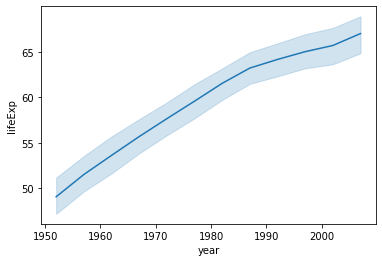

In [3]:
sns.lineplot(data['year'], data['lifeExp'])

## 02-Scatter, strip

In [4]:
data = px.data.iris()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

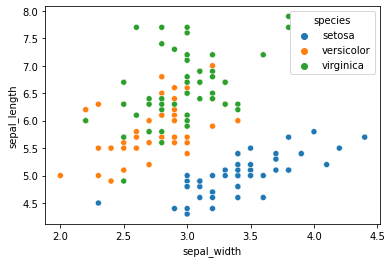

In [5]:
sns.scatterplot(data['sepal_width'], data['sepal_length'], hue = data['species'])

In [6]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


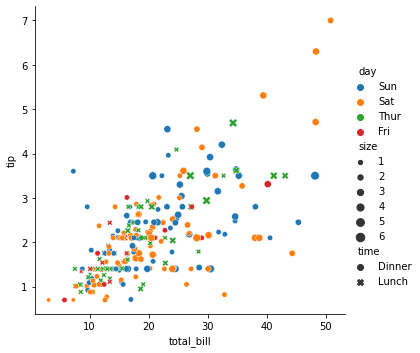

In [7]:
#sns.relplot(data=tips, x="total_bill", y="tip")  #plot 
#sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="day")
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="time", size="size")  # color plot

## 03-Bar Histograms

In [8]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


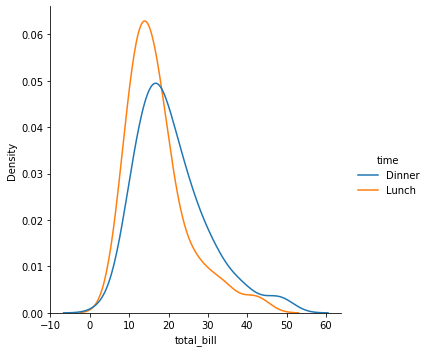

In [9]:
#sns.displot(data=tips, x="total_bill")  # 直方
#sns.displot(data=tips, x="total_bill", col="time")  #時間分離
#sns.displot(data=tips, x="total_bill", hue="time", stat="density", common_norm=False)  # hue 時間區分直方疊圖
sns.displot(data=tips, x="total_bill",  hue="time", kind="kde", common_norm=False)      # hue 時間區分線性疊圖

In [10]:
frame = pd.read_csv('input/pd-yearsale.csv' )
frame.head()

,year,quarters,sale1,sale2,sale3
0,2010,A,200,258,592
1,2010,B,328,664,606
2,2010,C,870,249,918
3,2010,D,209,971,629
4,2011,A,348,863,929


<AxesSubplot:>

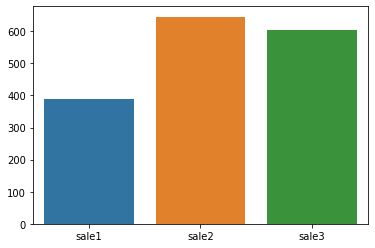

In [11]:
# sns.barplot(data = frame)
# sns.barplot(data = frame[['sale1','sale2','sale3']])
sns.barplot(data = frame[['sale1','sale2','sale3']], ci = False) #To remove confidence interval

<AxesSubplot:xlabel='year', ylabel='sale1'>

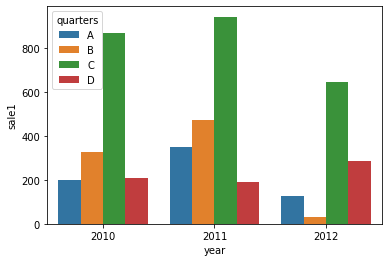

In [12]:
# sns.barplot(x= frame.year, y = frame.sale1, ci = False)
# sns.barplot(x= frame['year'], y = frame['sale1'], ci = False)
# sns.barplot(x =frame['year'], y = frame['sale1'], ci= False, orient = 'h')
sns.barplot(x= frame['year'], y = frame['sale1'], hue = frame['quarters'])

## 04-Box Plots, violin

In [13]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")
tips["percent_tip"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,day,time,size,percent_tip
0,16.99,0.71,Sun,Dinner,2,4.178929
1,10.34,1.16,Sun,Dinner,3,11.218569
2,21.01,2.45,Sun,Dinner,3,11.661114
3,23.68,2.32,Sun,Dinner,2,9.797297
4,24.59,2.53,Sun,Dinner,4,10.288735


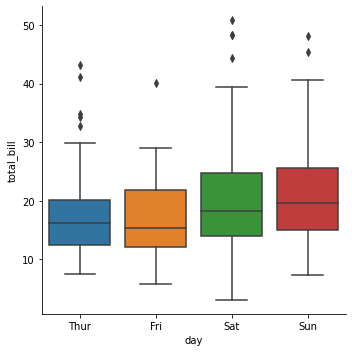

In [14]:
#sns.catplot(data=tips, x="day", y="total_bill")  #散佈圖
#sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"])  #排序
sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"], kind="box") #廂型圖

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


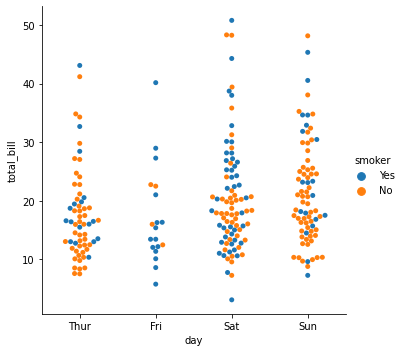

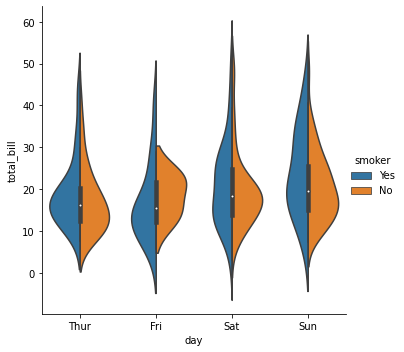

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", data=tips, split=True);

## Custom

In [17]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


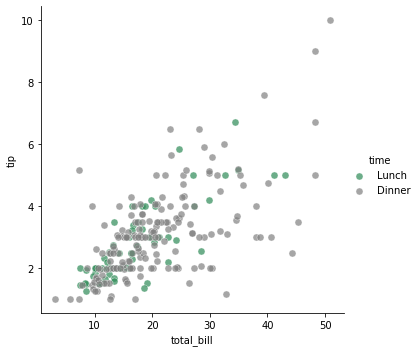

In [18]:
pal = dict(Lunch="seagreen",Dinner="gray")
g = sns.FacetGrid(tips, hue="time",palette=pal,height=5)
g.map(plt.scatter,"total_bill","tip",s=50,alpha=.7,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

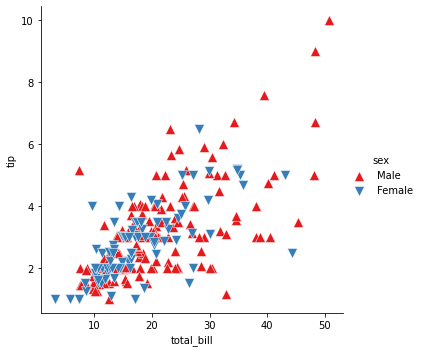

In [19]:
g = sns.FacetGrid(tips, hue="sex",palette="Set1",height=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=100,linewidth=.5,edgecolor="white")      
g.add_legend()
plt.show()

## Histograms and Density Plots

In [20]:
import pandas as pd
import seaborn as sns

frame = pd.read_csv('input/pd-seaborn.csv')
frame.head()

,age,wage
0,39.0,48.0
1,28.0,44.0
2,28.0,49.0
3,36.0,56.0
4,30.0,24.0


<AxesSubplot:ylabel='Frequency'>

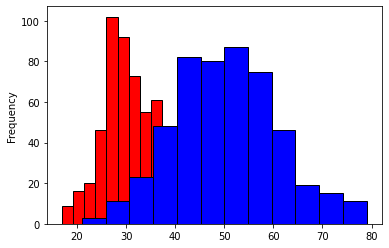

In [21]:
#frame['age'].plot.hist(bins = 12)
frame['age'].plot.hist(bins = 12, color = 'red', edgecolor = 'black', linewidth = 1)
frame['wage'].plot.hist(bins = 12, color = 'blue', edgecolor = 'black', linewidth = 1)

To create a density plot, we use the function **plot.density()**:

<AxesSubplot:ylabel='Density'>

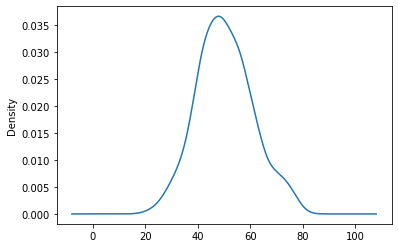

In [22]:
frame['wage'].plot.density()

In [23]:
# sns.boxplot(x=df2["class"], y=df2["Petal Width"])  #盒狀圖
# sns.violinplot(x=df2["Petal Length"], y=df2["Petal Width"]) # 提琴圖
# sns.regplot(x=df2["Petal Length"], y=df2["Petal Width"],ci=10) # 分佈圖

In [24]:
# data.describe().style.background_gradient(cmap = 'Greens')
# data.isnull().sum()

## Example

In [25]:
# Ploting with x and y
import numpy as np
import pandas as pd
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.rand(500, 6),0)

In [26]:
data = np.random.multivariate_normal([0,0], [[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

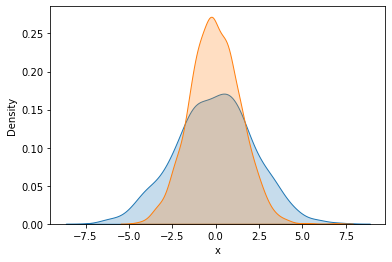

In [27]:

# For KD Plot with normal distrubution 

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

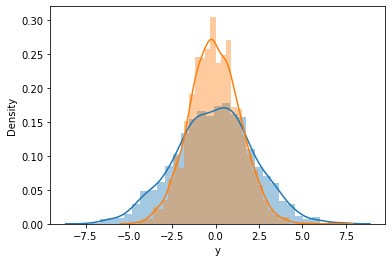

In [28]:
sns.distplot(data['x'])
sns.distplot(data['y'])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


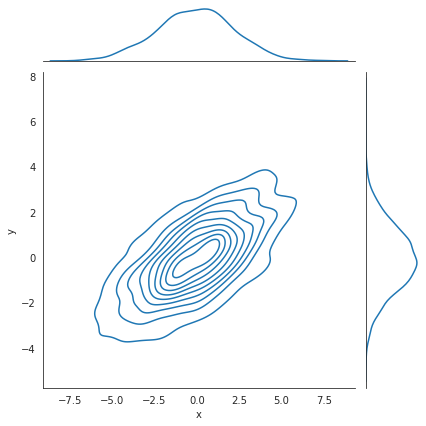

In [29]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="kde")


In [30]:
# We can also plot a joint plot using seaborn

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


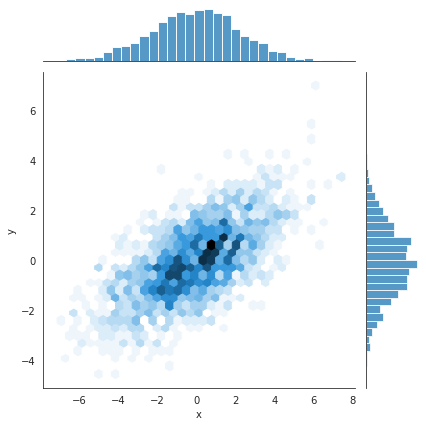

In [31]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="hex")

In [32]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


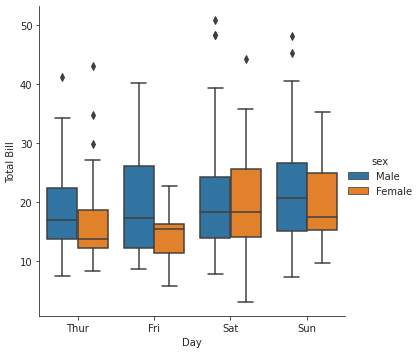

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips,kind="box")
    g.set_axis_labels("Day","Total Bill");

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


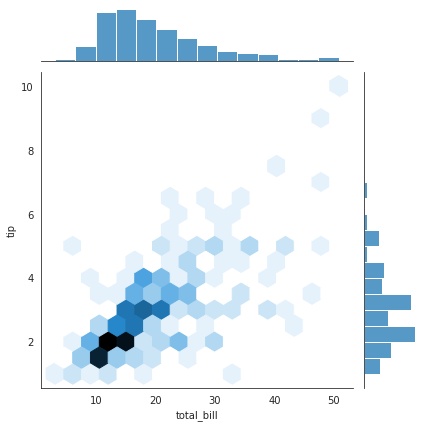

In [34]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


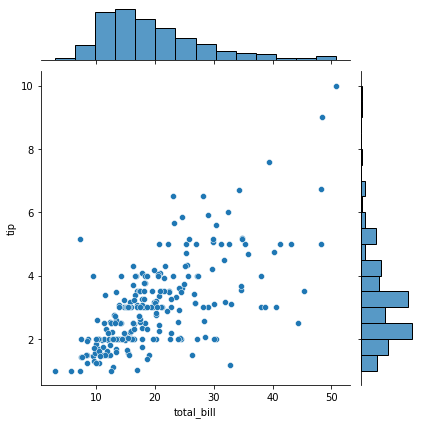

In [35]:
sns.jointplot("total_bill", "tip", data=tips)

In [36]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


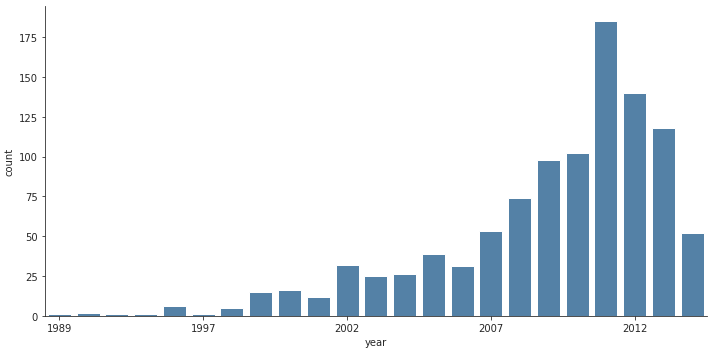

In [37]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("year", data=planets, aspect = 2,kind="count", color="steelblue")
    g.set_xticklabels(step=5)

## Subplot

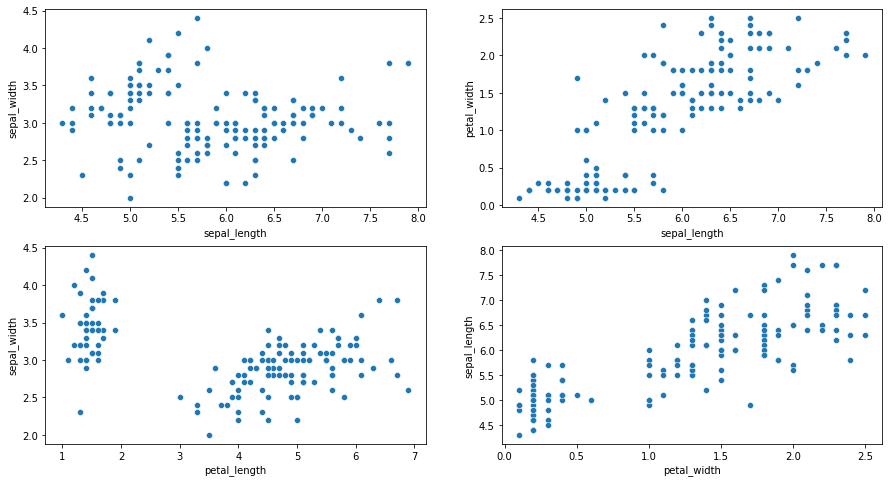

In [38]:
data = px.data.iris()
data.head()
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 2, 1)
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'])   #在 Searn必須要指定出 x,y 參數

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['sepal_length'], y=data['petal_width'])

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['petal_length'], y=data['sepal_width'])

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['petal_width'], y=data['sepal_length'])
plt.show()

In [39]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


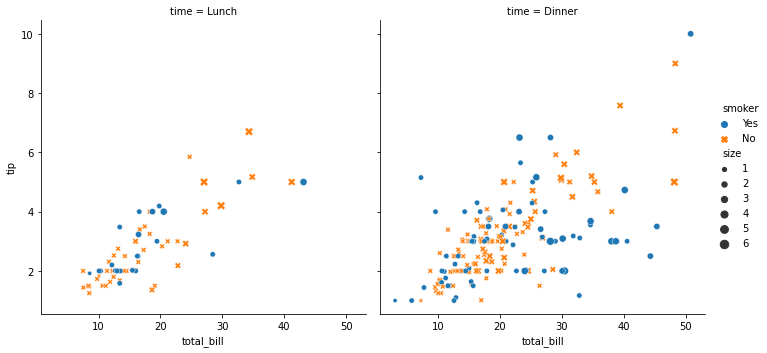

In [40]:
sns.relplot(x="total_bill", y="tip", col="time",hue="smoker", style="smoker", size="size",data=tips);

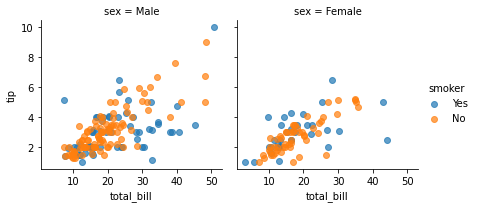

In [41]:
g=sns.FacetGrid(tips,col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()

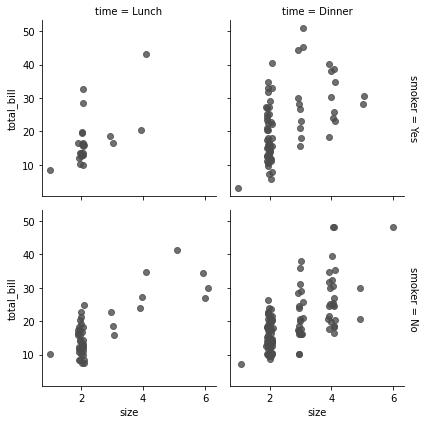

In [42]:
g=sns.FacetGrid(tips,row="smoker", col="time",margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color =".3",fit_reg=False, x_jitter=.1)
plt.show()